#연습문제 3

###본 연습문제는 1주차 Neural Simulation 복습 및 function와 class 를 정의해보고 이를 활용해 보는 것을 목표으로 합니다.

Neural simulation 중에서 가장 널리 활용되는 Hodkins-Huxly(HH) 모델을 이용해 실습을 수행할 것입니다. function 생성에 집중하기 위해 1주차때 수행되었던 소스코드는 간단한 해설과 같이 제공됩니다.  

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


위 명령어는 시각화모듈인 matplotlib에서 제공하는 함수를 빌트인 함수처럼 호출이 가능하도록 해주며 출력되는 그래프를 output 란에 출력이 가능하도록 해주는 명령어입니다.

In [3]:
from numpy import *         # numpy 모듈을 불러오기
from __future__ import division

- numpy는 numerical python 이라는 모듈로 python 내에서 다양한 수학적 연산처리를 수행하는데 편리한 함수들을 제공하는 모듈입니다.
- 일반적으로 numpy 모듈을 import 하는 경우 다음과 같은 2가지 방법 중에 1가지를 사용합니다.

>import numpy as np

>from numpy import *

- 위의 방법은 모듈을 np라는 약어로 호출해오는 경우로 numpy 모듈 내 함수를 불러오기 위해선 np.[function name]의 형태를 사용합니다
- 아래의 방법은 numpy 모듈의 모든함수(*)를 직접 불러오기 때문에 빌트인 함수처럼 사용할 수 있는 장점이 있지만, 너무 많은 모듈을 위와 같은 형태로 불러들이면 함수명이 중첩되는 경우 처리가 곤란해집니다.

### 아래는 1주차 수업때 수행했던 신경세포의 HH 모델을 시뮬레이션 하기 위한 파이썬 코드입니다.

$$\frac{dV}{dt} = \frac{1}{C_m}(I_m - g_{Na}m^3h(V-E_{Na})-g_Kn^4(V-E_K)-g_l(V-E_l))$$

In [4]:
# K channel
alpha_n = vectorize(lambda v: 0.01*(-v + 10)/(exp((-v + 10)/10) - 1) if v != 10 else 0.1)
beta_n  = lambda v: 0.125*exp(-v/80)
n_inf   = lambda v: alpha_n(v)/(alpha_n(v) + beta_n(v))

# Na channel (activating)
alpha_m = vectorize(lambda v: 0.1*(-v + 25)/(exp((-v + 25)/10) - 1) if v != 25 else 1)
beta_m  = lambda v: 4*exp(-v/18)
m_inf   = lambda v: alpha_m(v)/(alpha_m(v) + beta_m(v))

# Na channel (inactivating)
alpha_h = lambda v: 0.07*exp(-v/20)
beta_h  = lambda v: 1/(exp((-v + 30)/10) + 1)
h_inf   = lambda v: alpha_h(v)/(alpha_h(v) + beta_h(v))

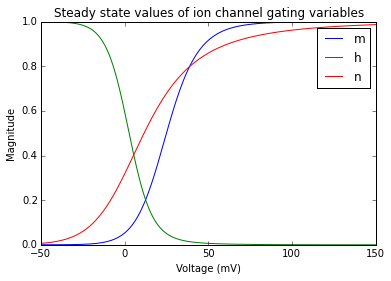

In [5]:
### Channel Activity ###
v = arange(-50,151) # mV
figure()
plot(v, m_inf(v), v, h_inf(v), v, n_inf(v))
legend(('m','h','n'))
title('Steady state values of ion channel gating variables')
ylabel('Magnitude')
xlabel('Voltage (mV)')

In [ ]:
## setup parameters and state variables
T     = 55    # ms
dt    = 0.025 # ms
time  = arange(0,T+dt,dt)

In [ ]:
## HH Parameters
V_rest  = 0      # mV
Cm      = 1      # uF/cm2
gbar_Na = 120    # mS/cm2
gbar_K  = 36     # mS/cm2
gbar_l  = 0.3    # mS/cm2
E_Na    = 115    # mV
E_K     = -12    # mV
E_l     = 10.613 # mV

Vm      = zeros(len(time)) # mV
Vm[0]   = V_rest
m       = m_inf(V_rest)      
h       = h_inf(V_rest)
n       = n_inf(V_rest)

In [ ]:
## Stimulus
I = zeros(len(time))
for i, t in enumerate(time):
    if 5 <= t <= 30: I[i] = 10 # uA/cm2 (stimulus_onset <= t <= stimulus_end 를 의미하는 부분)

In [6]:
## Simulate Model
for i in range(1,len(time)):
    g_Na = gbar_Na*(m**3)*h
    g_K  = gbar_K*(n**4)
    g_l  = gbar_l

    m += (alpha_m(Vm[i-1])*(1 - m) - beta_m(Vm[i-1])*m) * dt
    h += (alpha_h(Vm[i-1])*(1 - h) - beta_h(Vm[i-1])*h) * dt
    n += (alpha_n(Vm[i-1])*(1 - n) - beta_n(Vm[i-1])*n) * dt

    Vm[i] = Vm[i-1] + (I[i-1] - g_Na*(Vm[i-1] - E_Na) - g_K*(Vm[i-1] - E_K) - g_l*(Vm[i-1] - E_l)) / Cm * dt

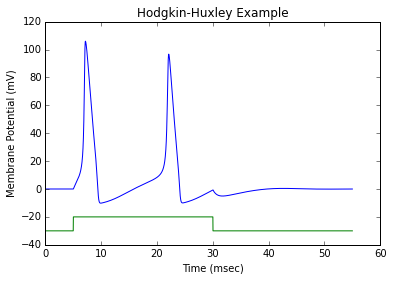

In [7]:
## plot membrane potential trace
figure()
plot(time, Vm, time, -30+I)
title('Hodgkin-Huxley Example')
ylabel('Membrane Potential (mV)')
xlabel('Time (msec)')

## 연습문제 3-1. 위의 코드를 이용해 다음 함수를 작성하시오.
- T, dt, stimulus_onset, stimulus_end 를 input 으로 받아 [time, Vm, I] 을 리턴해주는 hh_simulate 함수
- time, Vm, I 를 input 으로 받아 상기 Hodgkin-Huxley Example 그래프를 출력해주는 hh_plot 함수

## 연습문제 3-2. 위의 코드를 이용해 다음 조건을 만족하는 Class 를 작성하시오.

class HH_method:

    def __init__(self):
        pass
    
    def setup(self, T, dt):
        pass
        
    def stimulus(self, onset, end):
        pass
    
    def plot(self):
        pass

- 위의 구조를 이용해 다음 명령어를 수행하였을때 상기 그래프와 동일한 그래프가 출력되는 클래스를 작성하시오

>model = HH_method()  # model 이라는 object 생성

>model.setup(55, 0.025)

>model.stumulus(5, 30)

>model.plot()